In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand 
import sklearn as skl
import geopandas as gpd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from matplotlib.colors import ListedColormap

In [191]:
ames = pd.read_csv('../../Desktop/ISDS 577 Capstone Project/datasets/AmesHousing.csv')
ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [192]:
ames = ames.fillna(0)
ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,0,IR1,Lvl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,0,Reg,Lvl,...,0,0,MnPrv,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,0,IR1,Lvl,...,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,0,Reg,Lvl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,0,IR1,Lvl,...,0,0,MnPrv,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,0,IR1,Lvl,...,0,0,GdPrv,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,0.0,8885,Pave,0,IR1,Low,...,0,0,MnPrv,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,0,Reg,Lvl,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,0,Reg,Lvl,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [193]:
amess = ames[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'SalePrice', 'Kitchen AbvGr', 'Gr Liv Area', 'Year Built', 'Total Bsmt SF', 'Garage Area']]
amess

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Kitchen AbvGr,Gr Liv Area,Year Built,Total Bsmt SF,Garage Area
0,1.0,0.0,1,0,3,215000,1,1656,1960,1080.0,528.0
1,0.0,0.0,1,0,2,105000,1,896,1961,882.0,730.0
2,0.0,0.0,1,1,3,172000,1,1329,1958,1329.0,312.0
3,1.0,0.0,2,1,3,244000,1,2110,1968,2110.0,522.0
4,0.0,0.0,2,1,3,189900,1,1629,1997,928.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0,3,142500,1,1003,1984,1003.0,588.0
2926,1.0,0.0,1,0,2,131000,1,902,1983,864.0,484.0
2927,0.0,1.0,1,0,3,132000,1,970,1992,912.0,0.0
2928,1.0,0.0,1,0,2,170000,1,1389,1974,1389.0,418.0


In [194]:
amess['Total Full Bath'] = amess['Bsmt Full Bath'] + amess['Full Bath']
amess['Total Half Bath'] = amess['Bsmt Half Bath'] + amess['Half Bath']
amess

/var/folders/1y/9l7hcb7130j6dxjcqf8v59k00000gn/T/ipykernel_84535/3692008403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amess['Total Full Bath'] = amess['Bsmt Full Bath'] + amess['Full Bath']
/var/folders/1y/9l7hcb7130j6dxjcqf8v59k00000gn/T/ipykernel_84535/3692008403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amess['Total Half Bath'] = amess['Bsmt Half Bath'] + amess['Half Bath']


,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Kitchen AbvGr,Gr Liv Area,Year Built,Total Bsmt SF,Garage Area,Total Full Bath,Total Half Bath
0,1.0,0.0,1,0,3,215000,1,1656,1960,1080.0,528.0,2.0,0.0
1,0.0,0.0,1,0,2,105000,1,896,1961,882.0,730.0,1.0,0.0
2,0.0,0.0,1,1,3,172000,1,1329,1958,1329.0,312.0,1.0,1.0
3,1.0,0.0,2,1,3,244000,1,2110,1968,2110.0,522.0,3.0,1.0
4,0.0,0.0,2,1,3,189900,1,1629,1997,928.0,482.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0,3,142500,1,1003,1984,1003.0,588.0,2.0,0.0
2926,1.0,0.0,1,0,2,131000,1,902,1983,864.0,484.0,2.0,0.0
2927,0.0,1.0,1,0,3,132000,1,970,1992,912.0,0.0,1.0,1.0
2928,1.0,0.0,1,0,2,170000,1,1389,1974,1389.0,418.0,2.0,0.0


In [195]:
amess['Total Half Bath'] = amess['Total Half Bath'] * 0.5
amess

/var/folders/1y/9l7hcb7130j6dxjcqf8v59k00000gn/T/ipykernel_84535/3004543785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amess['Total Half Bath'] = amess['Total Half Bath'] * 0.5


,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Kitchen AbvGr,Gr Liv Area,Year Built,Total Bsmt SF,Garage Area,Total Full Bath,Total Half Bath
0,1.0,0.0,1,0,3,215000,1,1656,1960,1080.0,528.0,2.0,0.0
1,0.0,0.0,1,0,2,105000,1,896,1961,882.0,730.0,1.0,0.0
2,0.0,0.0,1,1,3,172000,1,1329,1958,1329.0,312.0,1.0,0.5
3,1.0,0.0,2,1,3,244000,1,2110,1968,2110.0,522.0,3.0,0.5
4,0.0,0.0,2,1,3,189900,1,1629,1997,928.0,482.0,2.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0,3,142500,1,1003,1984,1003.0,588.0,2.0,0.0
2926,1.0,0.0,1,0,2,131000,1,902,1983,864.0,484.0,2.0,0.0
2927,0.0,1.0,1,0,3,132000,1,970,1992,912.0,0.0,1.0,0.5
2928,1.0,0.0,1,0,2,170000,1,1389,1974,1389.0,418.0,2.0,0.0


In [196]:
amess['Total Bath'] = amess['Total Full Bath'] + amess['Total Half Bath']
amess

/var/folders/1y/9l7hcb7130j6dxjcqf8v59k00000gn/T/ipykernel_84535/1703516181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amess['Total Bath'] = amess['Total Full Bath'] + amess['Total Half Bath']


,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Kitchen AbvGr,Gr Liv Area,Year Built,Total Bsmt SF,Garage Area,Total Full Bath,Total Half Bath,Total Bath
0,1.0,0.0,1,0,3,215000,1,1656,1960,1080.0,528.0,2.0,0.0,2.0
1,0.0,0.0,1,0,2,105000,1,896,1961,882.0,730.0,1.0,0.0,1.0
2,0.0,0.0,1,1,3,172000,1,1329,1958,1329.0,312.0,1.0,0.5,1.5
3,1.0,0.0,2,1,3,244000,1,2110,1968,2110.0,522.0,3.0,0.5,3.5
4,0.0,0.0,2,1,3,189900,1,1629,1997,928.0,482.0,2.0,0.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0,3,142500,1,1003,1984,1003.0,588.0,2.0,0.0,2.0
2926,1.0,0.0,1,0,2,131000,1,902,1983,864.0,484.0,2.0,0.0,2.0
2927,0.0,1.0,1,0,3,132000,1,970,1992,912.0,0.0,1.0,0.5,1.5
2928,1.0,0.0,1,0,2,170000,1,1389,1974,1389.0,418.0,2.0,0.0,2.0


In [197]:
amess = amess.dropna()

In [198]:
amess

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Kitchen AbvGr,Gr Liv Area,Year Built,Total Bsmt SF,Garage Area,Total Full Bath,Total Half Bath,Total Bath
0,1.0,0.0,1,0,3,215000,1,1656,1960,1080.0,528.0,2.0,0.0,2.0
1,0.0,0.0,1,0,2,105000,1,896,1961,882.0,730.0,1.0,0.0,1.0
2,0.0,0.0,1,1,3,172000,1,1329,1958,1329.0,312.0,1.0,0.5,1.5
3,1.0,0.0,2,1,3,244000,1,2110,1968,2110.0,522.0,3.0,0.5,3.5
4,0.0,0.0,2,1,3,189900,1,1629,1997,928.0,482.0,2.0,0.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0,3,142500,1,1003,1984,1003.0,588.0,2.0,0.0,2.0
2926,1.0,0.0,1,0,2,131000,1,902,1983,864.0,484.0,2.0,0.0,2.0
2927,0.0,1.0,1,0,3,132000,1,970,1992,912.0,0.0,1.0,0.5,1.5
2928,1.0,0.0,1,0,2,170000,1,1389,1974,1389.0,418.0,2.0,0.0,2.0


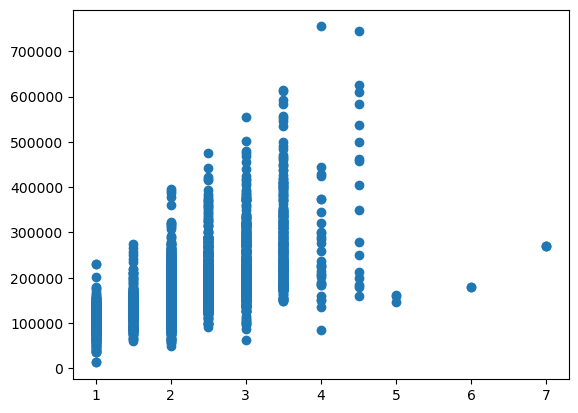

In [199]:
plt.scatter(amess['Total Bath'], amess['SalePrice'])

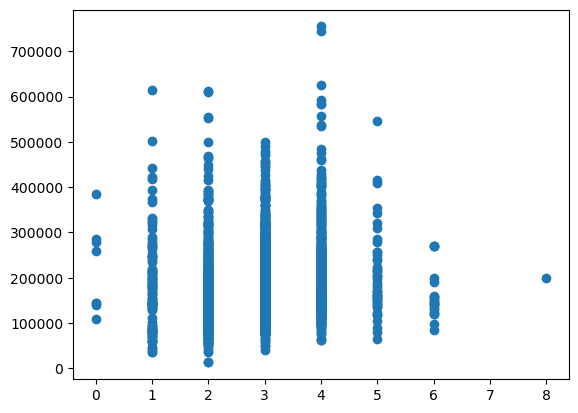

In [253]:
plt.scatter(amess['Bedroom AbvGr'], amess['SalePrice'])

In [200]:
X = amess['Total Bath'].values.reshape(-1,1)
y = amess['SalePrice']

In [201]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [202]:
#split temp testing dataset into test and valid
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [203]:
print("Train data's size: ", X_train.shape)
print("Train data's size: ", X_train.shape)


Train data's size:  (1758, 1)
Train data's size:  (1758, 1)


In [251]:
# Assuming X_train and y_train are already defined and correctly formatted
# Step 2: Add a constant to the input features
X_sm = sm.add_constant(X)  # Adds a constant term to the predictor

# Step 3: Fit the OLS model
model = sm.OLS(y, X_sm)
results = model.fit()

# Step 4: Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1991.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        21:42:55   Log-Likelihood:                -36472.
No. Observations:                2930   AIC:                         7.295e+04
Df Residuals:                    2928   BIC:                         7.296e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.12e+04   3329.663     12.373      0.0

In [252]:
# Assuming X_train and y_train are already defined and correctly formatted
# Step 2: Add a constant to the input features
X_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor

# Step 3: Fit the OLS model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Step 4: Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     1205.
Date:                Tue, 07 May 2024   Prob (F-statistic):          1.68e-201
Time:                        21:42:59   Log-Likelihood:                -21833.
No. Observations:                1758   AIC:                         4.367e+04
Df Residuals:                    1756   BIC:                         4.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.596e+04   4095.568     11.221      0.0

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

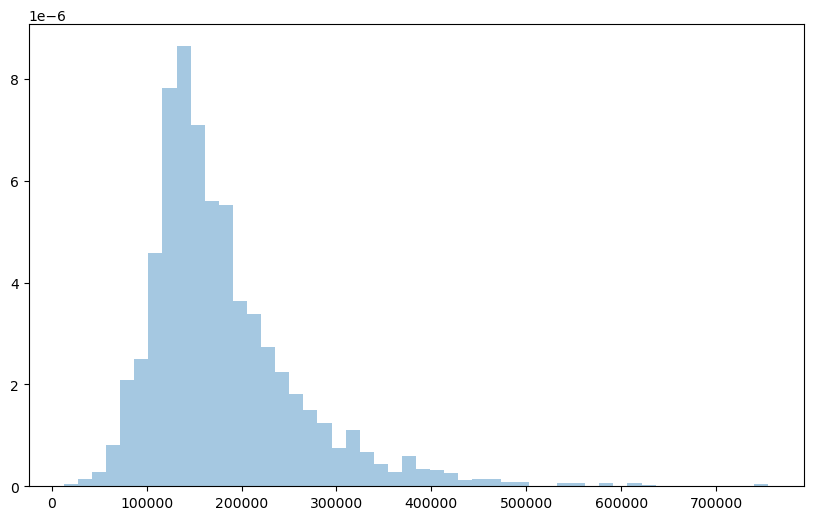

In [205]:
#distribution plot for sale price
plt.figure(figsize=(10,6))
sb.distplot(y)
plt.title('House Sale Price Distribution')

In [206]:
print(f"""Skewness: {y.skew()} Kurtosis: {y.kurt()}""")

Skewness: 1.7435000757376466 Kurtosis: 5.118899951130896


In [207]:
salecorr = X_train.corr()['SalePrice'].sort_values(ascending = False)
salecorr.head(11)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [208]:
plt.scatter(X, y

SyntaxError: unexpected EOF while parsing (1907679907.py, line 1)

In [209]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors


In [210]:
# Train the model
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [211]:
# Making predictions
y_test_pred = knn_regressor.predict(X_test)

In [212]:
# Evaluating the model
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 4267683243.263277, RMSE: 65327.507554347096


In [213]:
knn_r2 = r2_score(y_test, y_test_pred)
print(f'Test R^2: {knn_r2}')

Test R^2: 0.37397730253888395


In [214]:
y_pred_val = knn_regressor.predict(X_val)

In [215]:
valmse = mean_squared_error(y_val, y_pred_val)
valmse

4484906826.458703

In [216]:
valrmse = np.sqrt(valmse)
valrmse

66969.44696246716

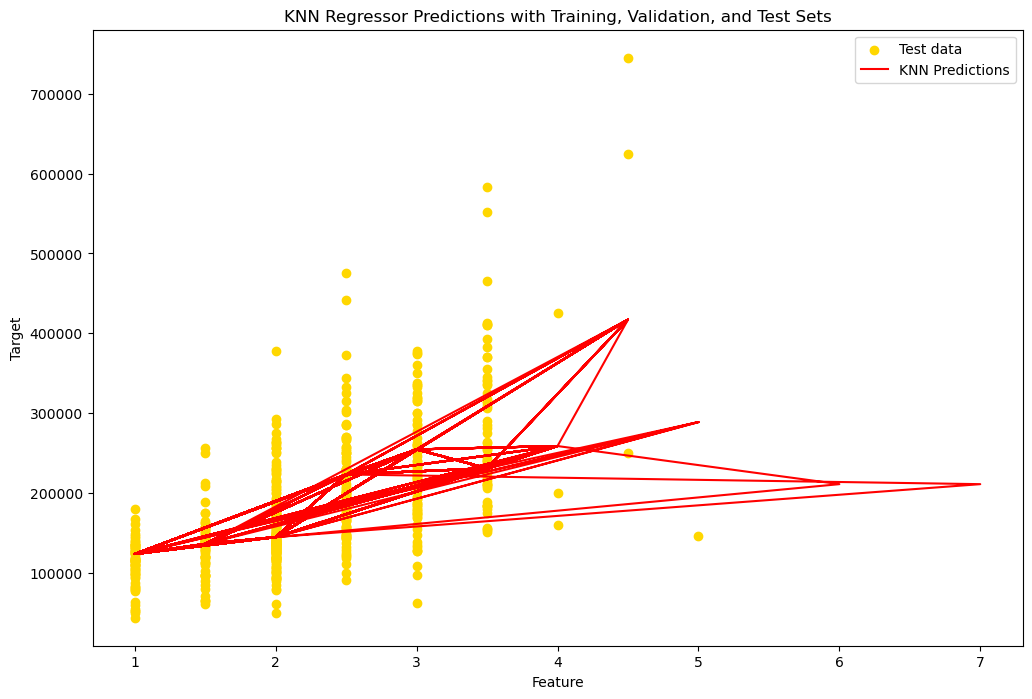

In [217]:
plt.figure(figsize=(12, 8))
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.scatter(X_val, y_val, color='green', label='Validation data')
plt.scatter(X_test, y_test, color='gold', label='Test data')
plt.plot(X, knn_regressor.predict(X), color='red', label='KNN Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('KNN Regressor Predictions with Training, Validation, and Test Sets')
plt.show()

In [218]:
#Initialize model
tlr = LinearRegression()

In [219]:
#fit model
tlr.fit(X_train, y_train)

LinearRegression()

In [220]:
#Make Predictions
y_predd = tlr.predict(X_test)

In [221]:
# Evaluating the model
msel = mean_squared_error(y_test, y_predd)
rmsel = np.sqrt(msel)

print(f'MSE: {msel}, RMSE: {rmsel}')

MSE: 4089099301.161438, RMSE: 63946.06556436008


In [222]:
lr_r2 = r2_score(y_test, y_predd)
print(f'Test R^2: {lr_r2}')

Test R^2: 0.40017362377109134


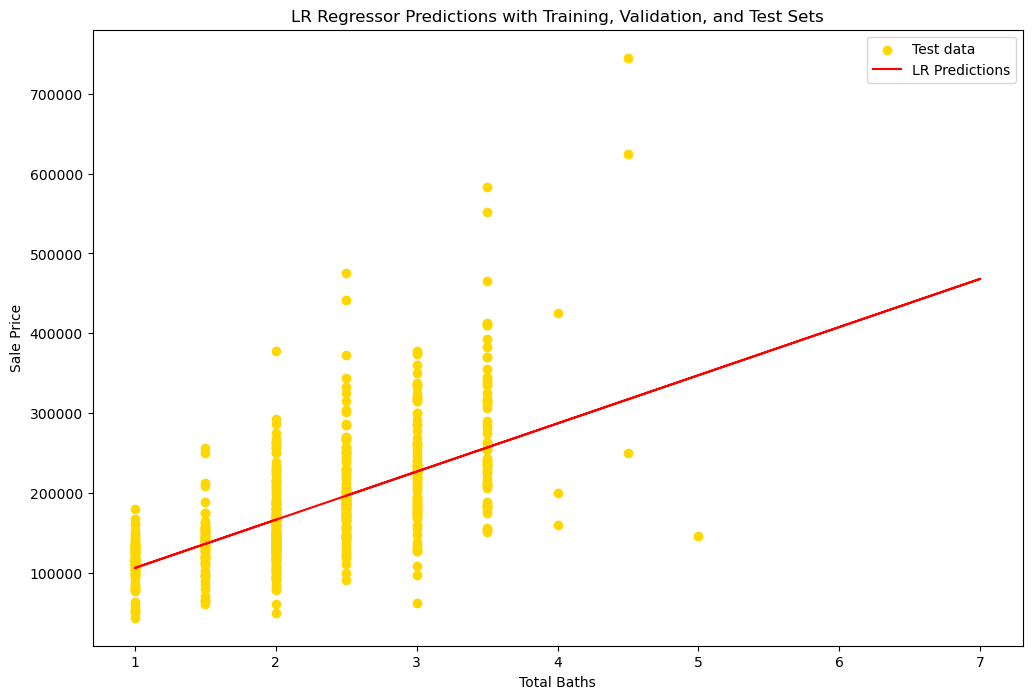

In [223]:
plt.figure(figsize=(12, 8))
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.scatter(X_val, y_val, color='green', label='Validation data')
plt.scatter(X_test, y_test, color='gold', label='Test data')
plt.plot(X, tlr.predict(X), color='red', label='LR Predictions')
plt.xlabel('Total Baths')
plt.ylabel('Sale Price')
plt.legend()
plt.title('LR Regressor Predictions with Training, Validation, and Test Sets')
plt.show()

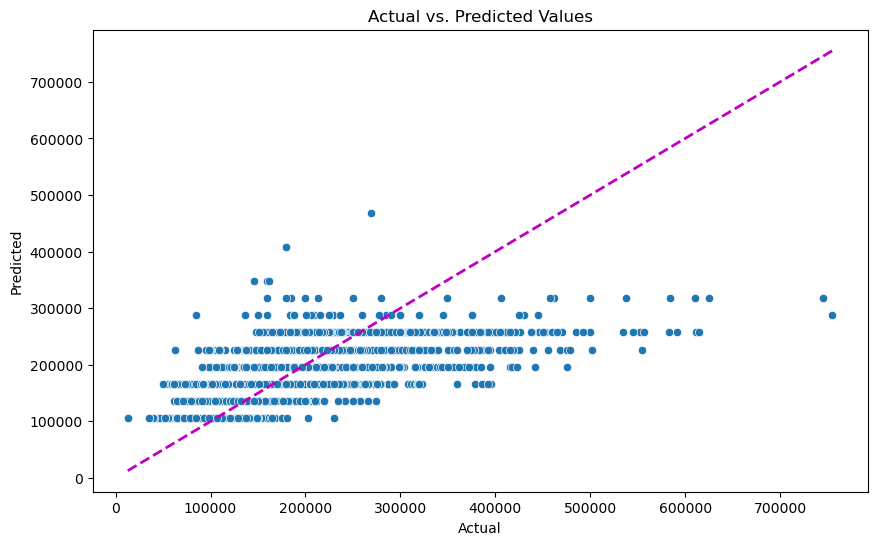

In [224]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x=y, y=tlr.predict(X))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'm--', lw=2)  # Line showing perfect predictions
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

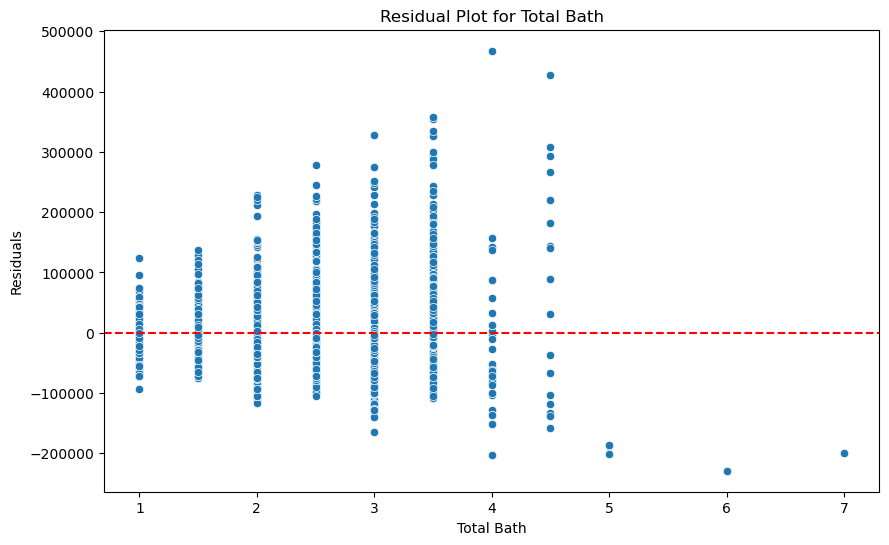

In [225]:
residuals = y - tlr.predict(X)
feature_name = 'Total Bath'  # Change this to your actual feature name

# Assuming 'residuals' is calculated as y - model.predict(X)
plt.figure(figsize=(10, 6))
sb.scatterplot(x=X[:,0], y=residuals)  # Assuming that the feature of interest is the first column
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for ' + feature_name)
plt.xlabel(feature_name)
plt.ylabel('Residuals')
plt.show()



In [226]:
amess

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Kitchen AbvGr,Gr Liv Area,Year Built,Total Bsmt SF,Garage Area,Total Full Bath,Total Half Bath,Total Bath
0,1.0,0.0,1,0,3,215000,1,1656,1960,1080.0,528.0,2.0,0.0,2.0
1,0.0,0.0,1,0,2,105000,1,896,1961,882.0,730.0,1.0,0.0,1.0
2,0.0,0.0,1,1,3,172000,1,1329,1958,1329.0,312.0,1.0,0.5,1.5
3,1.0,0.0,2,1,3,244000,1,2110,1968,2110.0,522.0,3.0,0.5,3.5
4,0.0,0.0,2,1,3,189900,1,1629,1997,928.0,482.0,2.0,0.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0,3,142500,1,1003,1984,1003.0,588.0,2.0,0.0,2.0
2926,1.0,0.0,1,0,2,131000,1,902,1983,864.0,484.0,2.0,0.0,2.0
2927,0.0,1.0,1,0,3,132000,1,970,1992,912.0,0.0,1.0,0.5,1.5
2928,1.0,0.0,1,0,2,170000,1,1389,1974,1389.0,418.0,2.0,0.0,2.0


In [227]:
newbathX = amess[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']]
newy = amess.SalePrice

In [228]:
newbathX_train, newX_temp, newy_train, newy_temp = train_test_split(newbathX, newy, test_size = 0.4, random_state = 42)

In [229]:
#split temp testing dataset into test and valid
newbathX_val, newbathX_test, newy_val, newy_test = train_test_split(newX_temp, newy_temp, test_size = 0.5, random_state = 42)

In [230]:
mlrmodel = LinearRegression()
mlrmodel.fit(newbathX_train, newy_train)

LinearRegression()

In [231]:
#Validation
mlryval_pred = mlrmodel.predict(newbathX_val)
mval_mse = mean_squared_error(newy_val, mlryval_pred)
mval_rmse = np.sqrt(mval_mse)
mval_r2 = r2_score(newy_val, mlryval_pred)
print(f'Validation MSE: {mval_mse}')
print(f'Validation RMSE: {mval_rmse}')
print(f'Validation R^2: {mval_r2}')

Validation MSE: 4001031558.8261895
Validation RMSE: 63253.7078662286
Validation R^2: 0.4212914287354502


In [232]:
#TEST
mlrytest_pred = mlrmodel.predict(newbathX_test)
mtest_mse = mean_squared_error(newy_test, mlrytest_pred)
mtest_rmse = np.sqrt(mtest_mse)
mtest_r2 = r2_score(newy_test, mlrytest_pred)
print(f'Test MSE: {mtest_mse}')
print(f'Test RMSE: {mtest_rmse}')
print(f'Test R^2: {mtest_r2}')

Test MSE: 3896842283.1134477
Test RMSE: 62424.69289562783
Test R^2: 0.42837563647534305


In [233]:
newbathX = amess[['Total Bath', 'Bedroom AbvGr']]
newy = amess.SalePrice

In [234]:
newbathX_train, newX_temp, newy_train, newy_temp = train_test_split(newbathX, newy, test_size = 0.4, random_state = 42)

In [235]:
newbathX_val, newbathX_test, newy_val, newy_test = train_test_split(newX_temp, newy_temp, test_size = 0.5, random_state = 42)

In [242]:

# Assuming X_train and y_train are already defined and correctly formatted
# Step 2: Add a constant to the input features
X_sm2 = sm.add_constant(newbathX)  # Adds a constant term to the predictor

# Step 3: Fit the OLS model
modell = sm.OLS(newy, X_sm2)
resultss = modell.fit()

# Step 4: Print the summary of the regression
print(resultss.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1337.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        21:32:29   Log-Likelihood:                -35129.
No. Observations:                2930   AIC:                         7.027e+04
Df Residuals:                    2922   BIC:                         7.032e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.704e+05   6.17e+04    -15.721

In [243]:
mlrmodel = LinearRegression()
mlrmodel.fit(newbathX_train, newy_train)

LinearRegression()

In [244]:
#Validation
mlryval_pred = mlrmodel.predict(newbathX_val)
mval_mse = mean_squared_error(newy_val, mlryval_pred)
mval_rmse = np.sqrt(mval_mse)
mval_r2 = r2_score(newy_val, mlryval_pred)
print(f'Validation MSE: {mval_mse}')
print(f'Validation RMSE: {mval_rmse}')
print(f'Validation R^2: {mval_r2}')

Validation MSE: 4167699087.668412
Validation RMSE: 64557.719040161355
Validation R^2: 0.3971846637488794


In [245]:
#TEST
mlrytest_pred = mlrmodel.predict(newbathX_test)
mtest_mse = mean_squared_error(newy_test, mlrytest_pred)
mtest_rmse = np.sqrt(mtest_mse)
mtest_r2 = r2_score(newy_test, mlrytest_pred)
print(f'Test MSE: {mtest_mse}')
print(f'Test RMSE: {mtest_rmse}')
print(f'Test R^2: {mtest_r2}')

Test MSE: 4088630463.349112
Test RMSE: 63942.39957453201
Test R^2: 0.40024239717699184


In [246]:
newbathX = amess[['Total Bath', 'Total Bsmt SF', 'Garage Area', 'Kitchen AbvGr', 'Gr Liv Area', 'Year Built', 'Bedroom AbvGr']]
newy = amess.SalePrice

In [247]:

# Assuming X_train and y_train are already defined and correctly formatted
# Step 2: Add a constant to the input features
X_train_sm2 = sm.add_constant(newbathX)  # Adds a constant term to the predictor

# Step 3: Fit the OLS model
modell = sm.OLS(newy, X_train_sm2)
resultss = modell.fit()

# Step 4: Print the summary of the regression
print(resultss.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1337.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        21:33:06   Log-Likelihood:                -35129.
No. Observations:                2930   AIC:                         7.027e+04
Df Residuals:                    2922   BIC:                         7.032e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.704e+05   6.17e+04    -15.721